# Word Cloud

This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from the dictionary.

Packets for upload the input file. To do the upload, an uploader widget is required.

In [9]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


**IMPORTANT!** If this was the first time running the above cell containing the installs and imports, please close and halt this notebook now. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take effect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. A "Browse" button should appear below it. Click this button and navigate the window to locate the text file in .txt format.

In [4]:
# This is the uploader widget

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `prueba.txt` (150.13 kB)


The uploader widget saved the contents of the uploaded file into a string object named *file_contents*.

The function in the cell below iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Also, it ignores word case, words that do not contain all alphabets and unimportant words like "and" or "the".

In [7]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    
    refined_text = ""
    frequency_count = {}
    
    #removing punctuation s and uninteresting words
    for char in file_contents:
        if char not in punctuations:
            refined_text += char
    
    #splitting the text into word list
    word_list = refined_text.split()
    
    #removing uninteresting words
    for word in word_list:
        if word.lower() not in uninteresting_words:
            if word in frequency_count:
                frequency_count[word] += 1
            else:
                frequency_count[word] = 1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequency_count)
    return cloud.to_array()

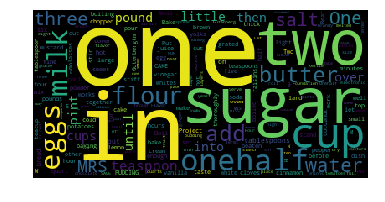

In [8]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()